In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

In [3]:
compoundXr=xarray.open_dataset('results/cmip6Compounds.nc')

In [15]:
compoundXr

<xarray.Dataset>
Dimensions:                    (fire: 2, compound: 9, experiment: 2, model: 37, year: 5341)
Coordinates:
  * experiment                 (experiment) object 'piControl' 'ssp585'
  * year                       (year) int64 1 2 3 4 5 ... 7890 7891 7892 7893
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound                   (compound) object 'nEvents' ... 'anyCompound'
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/16)
    nino34EastioSamwinter      (fire, compound, experiment, model, year) float64 ...
    nino34EastioSamsummer      (fire, compound, experiment, model, year) float64 ...
    nino34DmiSamwinter         (fire, compound, experiment, model, year) float64 ...
    nino34DmiSamsummer         (fire, compound, experiment, model, year) float64 ...
    cIndexEastioSamwinter      (fire, compound, model, experiment, year) float64 ...
    cIndexEastioSamsummer      (fire, compound, model, experiment, year) float64 ...
    ...                         ...
    eIndexDmiSamwinter         (fire, compound, model, experiment, year) float64 ...
    eIndexDmiSamsummer         (fire, compound, model, experiment, year) float64 ...
    ecCombinedEastioSamwinter  (fire, compound, model, experiment, year) float64 ...
    ecCombinedEastioSamsummer  (fire, compound, model, experiment, year) float64 ...
    ecCombinedDmiSamwinter     (fire, compound, model, experiment, year) float64 ...
    ecCombinedDmiSamsummer     (fire, compound, model, experiment, year) float64 ...
Attributes:
    indexNames:  ['nino3', 'eastIO', 'samSummer']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

In [25]:
mMeanXr=compoundXr.sel(
    experiment='ssp585', 
    year=slice(1850,2099), 
    compound='anyCompound',
    drop=True
).rolling(year=30, min_periods=15, center=True).sum('year').mean('model')

In [26]:
mMeanXr

<xarray.Dataset>
Dimensions:                    (year: 250, fire: 2)
Coordinates:
  * year                       (year) int64 1850 1851 1852 ... 2097 2098 2099
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/16)
    nino34EastioSamwinter      (fire, year) float64 1.892 2.027 ... 0.5946
    nino34EastioSamsummer      (fire, year) float64 2.324 2.486 ... 2.216 2.108
    nino34DmiSamwinter         (fire, year) float64 1.811 1.919 ... 0.2162
    nino34DmiSamsummer         (fire, year) float64 2.0 2.162 ... 2.0 1.892
    cIndexEastioSamwinter      (fire, year) float64 2.027 2.189 ... 0.8108
    cIndexEastioSamsummer      (fire, year) float64 2.486 2.703 ... 3.811 3.595
    ...                         ...
    eIndexDmiSamwinter         (fire, year) float64 2.0 2.162 ... 0.02703
    eIndexDmiSamsummer         (fire, year) float64 1.973 2.081 ... 0.3784
    ecCombinedEastioSamwinter  (fire, year) float64 2.784 3.0 ... 0.8649 0.8378
    ecCombinedEastioSamsummer  (fire, year) float64 3.216 3.432 ... 3.865 3.649
    ecCombinedDmiSamwinter     (fire, year) float64 2.676 2.892 ... 0.2703
    ecCombinedDmiSamsummer     (fire, year) float64 2.865 3.054 ... 3.838 3.622

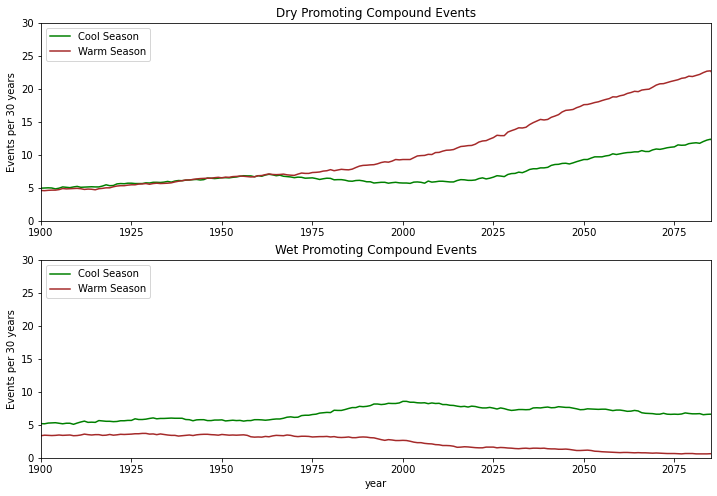

In [63]:
fig=plt.figure(figsize=(12,8))

ax=plt.subplot(2,1,1)

[
    mMeanXr['ecCombinedDmiSam'+iSeason].sel(fire='pos').plot(color=iColor) 
     for iSeason,iColor in {
         ('winter','brown'),
         ('summer','green')
     }
]

plt.legend(['Cool Season','Warm Season'], loc='upper left')



plt.xlabel('')
plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Dry Promoting Compound Events')
plt.ylabel('Events per 30 years')

ax=plt.subplot(2,1,2)

[mMeanXr['ecCombinedDmiSam'+iSeason].sel(fire='neg').plot(color=iColor) 
     for iSeason,iColor in {
         ('winter','brown'),
         ('summer','green')
     }
]

plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Wet Promoting Compound Events')
plt.ylabel('Events per 30 years')

plt.legend(['Cool Season','Warm Season'], loc='upper left')

plt.savefig('figures/cmipCompoundEventSummary.pdf')


In [39]:
eventsXr=xarray.open_dataset('results/obsEvents.nc')

In [43]:
import utils.compound as compound

In [52]:
obsCompoundsXr=compound.compound(eventsXr).sel(
    compound='anyCompound',drop=True
    ).rolling(year=30,  center=True).sum('year')

ecCombinedDmiSamsummer
ecCombinedDmiSamwinter
ecCombinedEastioSamsummer
ecCombinedEastioSamwinter
nino34DmiSamsummer
nino34DmiSamwinter
nino34EastioSamsummer
nino34EastioSamwinter
nino3DmiSamsummer
nino3DmiSamwinter
nino3EastioSamsummer
nino3EastioSamwinter
eIndexDmiSamsummer
eIndexDmiSamwinter
eIndexEastioSamsummer
eIndexEastioSamwinter
nino4DmiSamsummer
nino4DmiSamwinter
nino4EastioSamsummer
nino4EastioSamwinter
cIndexDmiSamsummer
cIndexDmiSamwinter
cIndexEastioSamsummer
cIndexEastioSamwinter


In [49]:
obsCompoundsXr

<xarray.Dataset>
Dimensions:                    (year: 64, fire: 2)
Coordinates:
  * year                       (year) int64 1957 1958 1959 ... 2018 2019 2020
    mode                       int64 0
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/24)
    ecCombinedDmiSamsummer     (fire, year) float64 3.0 4.0 4.0 ... 6.0 6.0 6.0
    ecCombinedDmiSamwinter     (fire, year) float64 1.0 2.0 2.0 ... 3.0 3.0 3.0
    ecCombinedEastioSamsummer  (fire, year) float64 3.0 4.0 4.0 ... 6.0 6.0 6.0
    ecCombinedEastioSamwinter  (fire, year) float64 1.0 2.0 2.0 ... 3.0 3.0 3.0
    nino34DmiSamsummer         (fire, year) float64 3.0 4.0 4.0 ... 3.0 3.0 3.0
    nino34DmiSamwinter         (fire, year) float64 1.0 2.0 2.0 ... 3.0 3.0 3.0
    ...                         ...
    nino4EastioSamsummer       (fire, year) float64 3.0 3.0 3.0 ... 5.0 5.0 5.0
    nino4EastioSamwinter       (fire, year) float64 1.0 1.0 1.0 ... 3.0 3.0 3.0
    cIndexDmiSamsummer         (fire, year) float64 3.0 4.0 4.0 ... 5.0 5.0 5.0
    cIndexDmiSamwinter         (fire, year) float64 1.0 2.0 2.0 ... 3.0 3.0 3.0
    cIndexEastioSamsummer      (fire, year) float64 3.0 4.0 4.0 ... 5.0 5.0 5.0
    cIndexEastioSamwinter      (fire, year) float64 1.0 2.0 2.0 ... 3.0 3.0 3.0
Attributes:
    indexNames:  ['ecCombined', 'dmi', 'samSummer']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

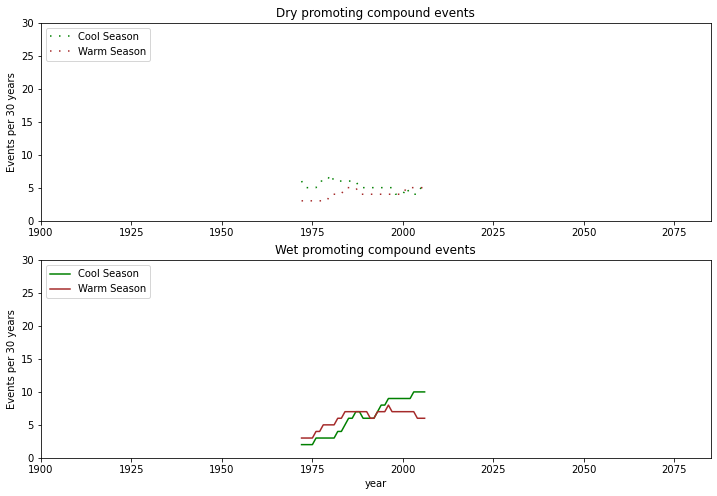

In [58]:
fig=plt.figure(figsize=(12,8))

ax=plt.subplot(2,1,1)

[
    obsCompoundsXr['ecCombinedDmiSam'+iSeason].sel(fire='pos').plot(color=iColor, dashes=(1,5)) 
     for iSeason,iColor in {
         ('winter','brown'),
         ('summer','green')
     }
]

plt.legend(['Cool Season','Warm Season'], loc='upper left')

plt.xlabel('')
plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Dry promoting compound events')
plt.ylabel('Events per 30 years')

ax=plt.subplot(2,1,2)

[
    obsCompoundsXr['ecCombinedDmiSam'+iSeason].sel(fire='neg').plot(color=iColor) 
     for iSeason,iColor in {
         ('winter','brown'),
         ('summer','green')
     }
]

plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Wet promoting compound events')
plt.ylabel('Events per 30 years')

plt.legend(['Cool Season','Warm Season'], loc='upper left')

